In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Overview

In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As there are no null values in the dataset so we dont need to handle missing value. 

# Data Visualization

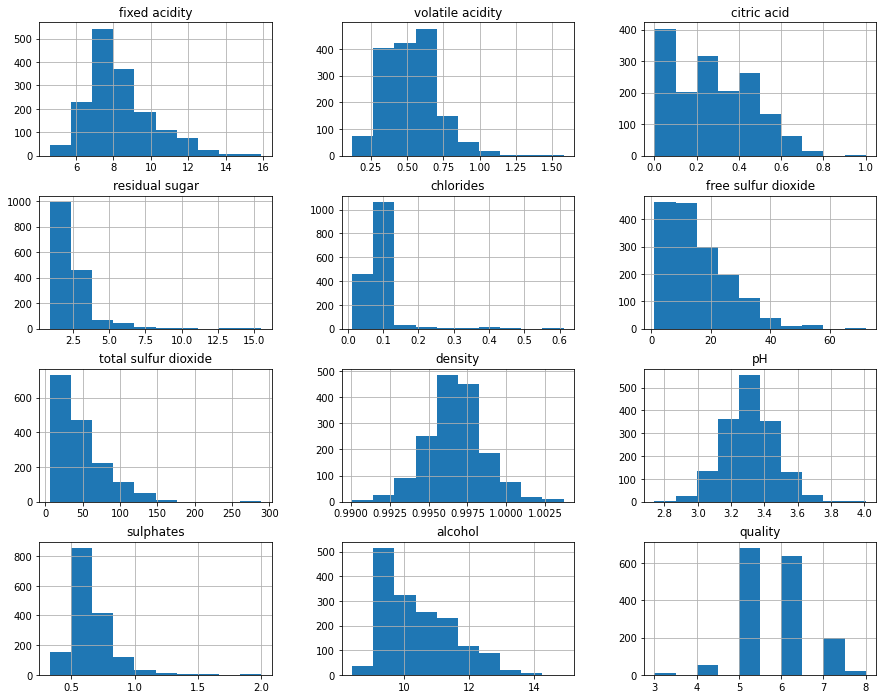

In [7]:
wine_data.hist(bins=10,figsize=(15,12))
plt.show()

<AxesSubplot:>

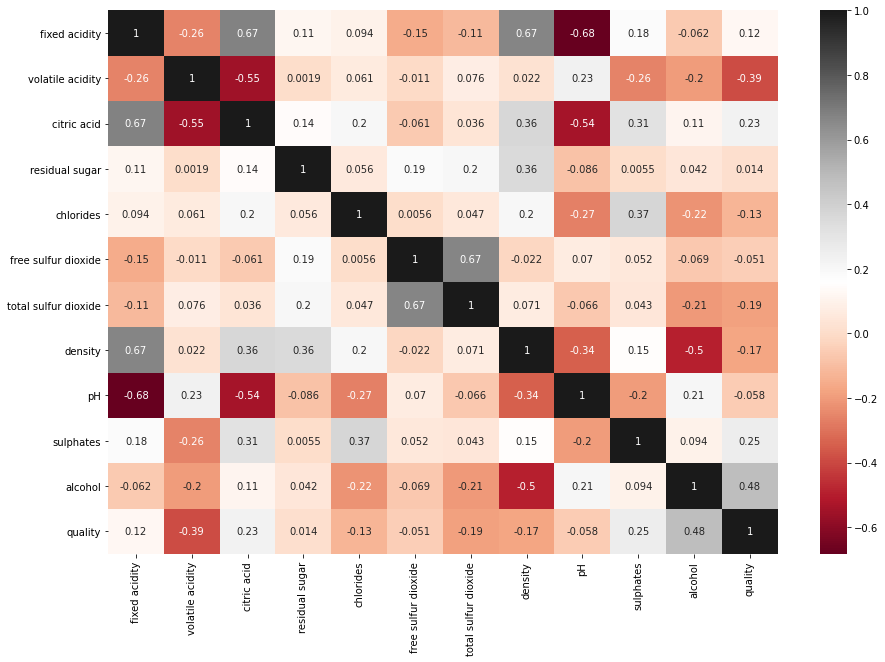

In [8]:
plt.figure(figsize=(15,10))
correlation = wine_data.corr()
sns.heatmap(correlation,annot=True,cmap='RdGy')

In [9]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

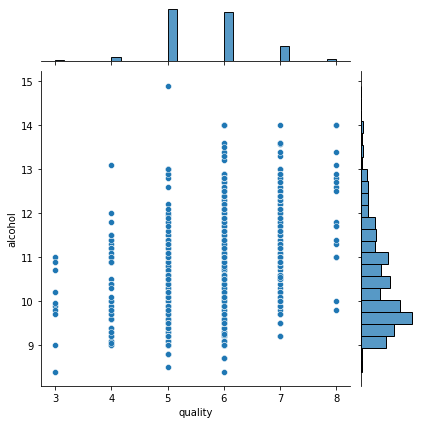

In [10]:
sns.jointplot(x='quality',y='alcohol',data=wine_data,kind='scatter')

Text(0.5, 1.0, 'Wine quality')

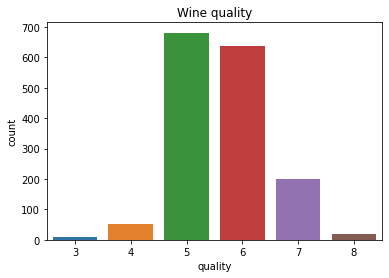

In [11]:
sns.countplot(x ='quality', data = wine_data).set_title("Wine quality")

categor_condn=[ (wine_df['quality']>=7),
               (wine_df['quality']<=4)]
rating=['superior','inferior']
wine_df['rating'] = np.select(categor_condn,rating,default='fine')

wine_df.head()

In [12]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Model Building

Rating:
Bad=2
    Average=1
     Good=0

In [13]:
rating = []
for num in wine_data['quality']:
    if num <= 4:
        rating.append('2')
    elif num <=7 :
        rating.append('1')
    elif num >=8 :
        rating.append('0')
wine_data["rating"] = rating
wine_data    
        

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [14]:
wine_data['rating'].value_counts()

1    1518
2      63
0      18
Name: rating, dtype: int64

As we can see that the data is highly imbalance,so first need to balance the data using oversampling.

In [15]:
x = wine_data.drop(['quality','rating'],axis = 1)
y = wine_data['rating'].values

In [16]:
x=x.values
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [17]:
y


array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=1)
xsample,ysample=ros.fit_resample(xtrain,ytrain)
pd.Series(ysample).value_counts()


0    1061
2    1061
1    1061
dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15)

In [21]:
model.fit(xsample,ysample)
ypred= model.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'accuracy score:- {accuracy_score(ytest, ypred)}')
print(f'confusion matrix:-\n {confusion_matrix(ytest, ypred)}')
print(f'classification report:-\n {classification_report(ytest, ypred)}')

accuracy score:- 0.9416666666666667
confusion matrix:-
 [[  0   5   0]
 [  3 452   2]
 [  0  18   0]]
classification report:-
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.95      0.99      0.97       457
           2       0.00      0.00      0.00        18

    accuracy                           0.94       480
   macro avg       0.32      0.33      0.32       480
weighted avg       0.91      0.94      0.92       480



In [23]:
model.score(xtrain,ytrain)

1.0

# Hyperparameter tunning using RandomizedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in range(10,100,5)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(1, 45, num = 5)]
min_samples_split = [5, 10]
criterion=['gini','entropy']
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion':criterion}


print(random_grid)

{'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 12, 23, 34, 45], 'min_samples_split': [5, 10], 'criterion': ['gini', 'entropy']}


In [25]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1, scoring='neg_mean_squared_error')
rf_random.fit(xsample,ysample)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=15),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 12, 23, 34, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [10, 15, 20, 25, 30, 35,
                                                         40, 45, 50, 55, 60, 65,
                                                         70, 75, 80, 85, 90,
                                                         95]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [26]:
rf_random.best_params_


{'n_estimators': 45,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 45,
 'criterion': 'gini'}

In [27]:
best_param=rf_random.best_estimator_
best_param

RandomForestClassifier(max_depth=45, min_samples_split=5, n_estimators=45)

In [36]:
new_model = RandomForestClassifier(max_depth=45, min_samples_split=5, n_estimators=40,max_features='sqrt',criterion= 'gini')
new_model.fit(xsample,ysample)
ypred= new_model.predict(xtest)
print(f'accuracy score:- {accuracy_score(ytest, ypred)}')
print(f'confusion matrix:-\n {confusion_matrix(ytest, ypred)}')
print(f'classification report:-\n {classification_report(ytest, ypred)}')

accuracy score:- 0.9875
confusion matrix:-
 [[  2   1   0]
 [  1 453   0]
 [  0   4  19]]
classification report:-
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.99      1.00      0.99       454
           2       1.00      0.83      0.90        23

    accuracy                           0.99       480
   macro avg       0.89      0.83      0.85       480
weighted avg       0.99      0.99      0.99       480



# VotingClassifier

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [38]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier(criterion="gini")
dt2 = DecisionTreeClassifier(criterion="entropy")

models = [('RanFor',model),("Logreg",lr), ("DT-gini", dt1), ("DT-ent", dt1)]

In [39]:
from sklearn.ensemble import VotingClassifier

In [40]:
x = wine_data.iloc[:, :-2]
y = wine_data.iloc[:, -1]

xtrain,xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [41]:
#Hard Voting
vc1 = VotingClassifier(estimators=models)
vc1.fit(xtrain, ytrain)
ypred = vc1.predict(xtest)
print(f'accuracy score:- {accuracy_score(ytest, ypred)}')


accuracy score:- 0.93125


In [42]:
#Soft Voting
vc2 = VotingClassifier(estimators=models, voting="soft")
vc2.fit(xtrain, ytrain)
ypred = vc2.predict(xtest)
print(f'accuracy score:- {accuracy_score(ytest, ypred)}')


accuracy score:- 0.9208333333333333
